# Image Convolutions
Note that "convolution" is a misnomer - the operation used in CNNs is actually the cross-correlation

In [8]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

## Cross Correlation

In [6]:
#2d correlation
def corr2d(X,K):
    h,w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1)) # account for no padding
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i,j] = (X[i:i+h, j:j+w]*K).sum()
    return Y
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

## Convolutional Layer

In [5]:
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, X):
        return corr2d(X,self.weight)+self.bias

## Edge Detection

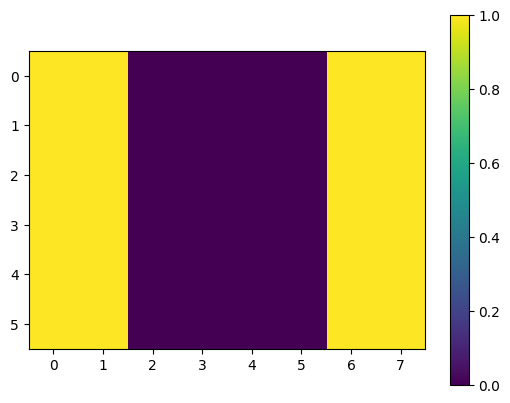

In [11]:
X = torch.ones((6, 8))
X[:, 2:6] = 0

plt.imshow(X,interpolation='none')
plt.colorbar()

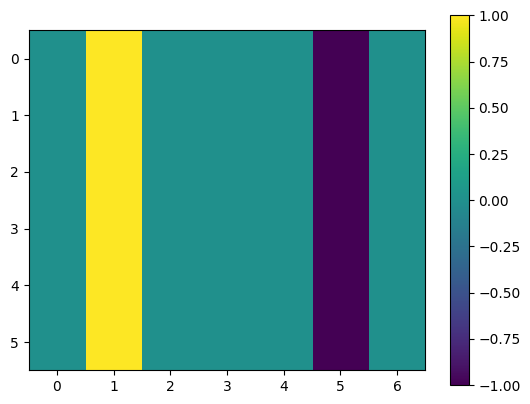

In [12]:
K = torch.tensor([[1.0, -1.0]])
Y = corr2d(X,K)
plt.imshow(Y)
plt.colorbar()

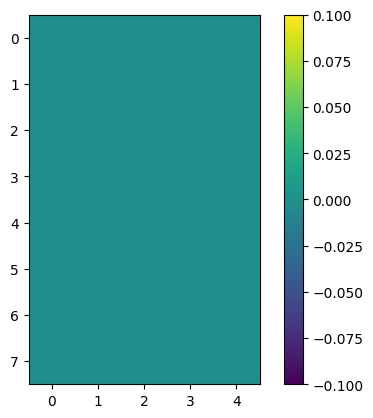

In [13]:
Z = corr2d(X.t(), K)

plt.imshow(Z)
plt.colorbar()

## Learn the kernel

In [14]:
# Construct a two-dimensional convolutional layer with 1 output channel and a
# kernel of shape (1, 2). For the sake of simplicity, we ignore the bias here
conv2d = nn.LazyConv2d(1, kernel_size=(1, 2), bias=False)

# The two-dimensional convolutional layer uses four-dimensional input and
# output in the format of (example, channel, height, width), where the batch
# size (number of examples in the batch) and the number of channels are both 1
X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))
lr = 3e-2  # Learning rate

for i in range(10):
    Y_hat = conv2d(X)
    l = (Y_hat - Y) ** 2
    conv2d.zero_grad()
    l.sum().backward()
    # Update the kernel
    conv2d.weight.data[:] -= lr * conv2d.weight.grad
    if (i + 1) % 2 == 0:
        print(f'epoch {i + 1}, loss {l.sum():.3f}')


epoch 2, loss 13.432
epoch 4, loss 3.304
epoch 6, loss 0.985
epoch 8, loss 0.341
epoch 10, loss 0.129


/home/will/ML-course-venv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


In [15]:
conv2d.weight.data.reshape((1, 2))

tensor([[ 0.9482, -1.0204]])